# Advanced Presentation - SMTPLib
- Professor Ben Nichols
- 2019-01-28

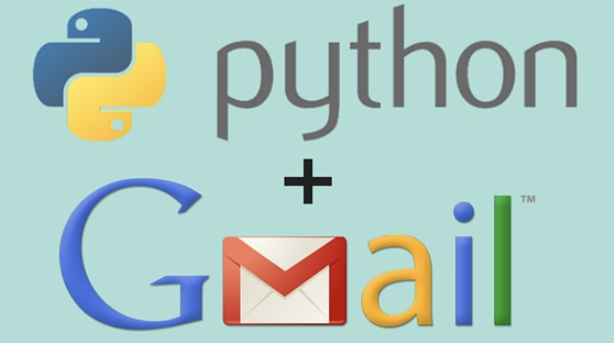

### What is SMTP?
#### SMTP: Simple Mail Transfer Protocol
This is the standard transmission protocol for sending email over the internet.

In [1]:
# importing a library means these respective objects, functions, and methods are now available to use in your program.
# smtplib came with my anaconda distribution so I did not need to install anything special.
### If smtplib did not come with python, it can be downloaded from 1 or 2 places:
    # Anaconda package manager (conda)
    # PyPi package manager (pip)
    # In the terminal or command prompt, type: "conda install smtplib" OR "pip install smtplib"

import smtplib

### I created a GMAIL Account just for the puposes of this demonstration
- I also enabled "Less Secure Applications" which is less secure from Google's point of view.
    - https://myaccount.google.com/lesssecureapps?pli=1
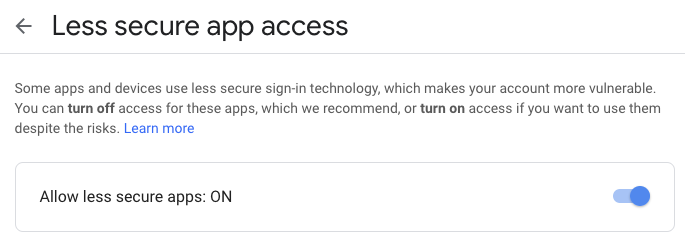

In [2]:
# created this email just for class!
email = 'BenTheProfessor652@gmail.com'

In [3]:
# Passwords can be very tricky to deal with.
# Here, I am using getpass so that I can type in the console without exposing it anywhere else in the code.

# It works the same as input, but doesn't echo the input to console.
import getpass

password = getpass.getpass(prompt='Enter Password to BenTheProfessor@gmail.com: ', stream=None)
print('Thanks')

Enter Password to BenTheProfessor@gmail.com: ········
Thanks


In [4]:
# recipient email address
# I am using my syr.edu account as the recipient.

send_to_email = 'bwnichol@syr.edu'

In [5]:
# email payload - what should be sent from BenTheProfessor652@gmail.com to bwnichol@syr.edu

subject = 'IST 652 - Class Demo of SMTPLib'
body = 'This is a test of the smtp lib package - spambox beware!\nFrom Benbot to ProfBen\n-Ben'

In [6]:
# SMTPLib does not differentiate between SUBJECT and BODY.
# Instead the program parses (i.e. seperates) using the format -
    ## Subject: (line break 2x) text_body
    
# This can be implemented using the string method .format(), for more information see the python docs:
### https://docs.python.org/3.4/library/functions.html#format

message = 'Subject: {sbj}\n\n{bd}'.format(sbj=subject, bd=body)

In [9]:
# I'll be using Google's SMTP server to route the mail from my gmail to syr.edu account.
# The SMTP method takes two parameters:
    ## 1 - the URL path to the server
    ## 2 - the server port (i.e. the way of identifying a specific process on a server)

# Next I invoke the starttls method which ensures that the communication
# from this process to the SMTP server is conducted over TLS encryption protocols

# lastly I login to the server which opens a live connection between my machine and Google's SMTP server
# This is the same as you would through the GMAIL email client (on desktop or website)
    
server = smtplib.SMTP('smtp.gmail.com',587)
server.starttls()
server.login(email, password)

(235, b'2.7.0 Accepted')

In [10]:
# This method uses the SMTP object we created (which has an active connection) and sends a mail with these parameters:
    ## 1 - Email from which the email is being sent (sender)
    ## 2 - Email to which the email is being sent (recipient)
    ## 3 - Message body, which we formatted specifically for it to be parsed into subject and body

server.sendmail(email, send_to_email, message)

{}

In [11]:
# Lastly, as a best practice, we'll want to end the connection when we are finished.

server.quit()

(221, b'2.0.0 closing connection y2sm86361486qtb.88 - gsmtp')

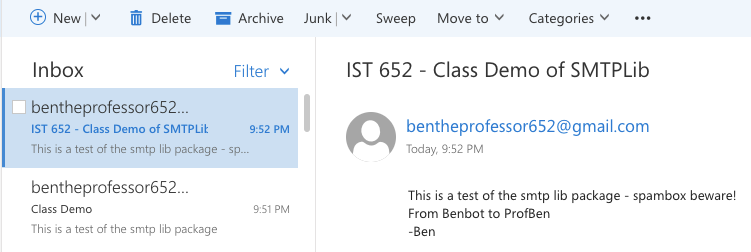

---

### Are there any competing libraries which could be used to augment or enhance email delivery?

#### Other popular email libraries available in python:
- from email.mime.text import MIMEText
    - This adds additional functionality to SMTPLib such as attaching files

### Additional Resources:
- https://docs.python.org/3/library/smtplib.html
- https://realpython.com/python-send-email/